In [1]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../../data/csv/FIFA_sentiment_text.csv")
df.head()

,subreddit,title,selftext,created_utc,year,month,post_date,sentiment
0,FIFA,if you every get bored...try 4 🌟,NaN,2023-02-22 21:07:53,2023,2,2023-02-22,pos
1,FIFA,Team of the week 17,NaN,2023-02-22 21:10:48,2023,2,2023-02-22,pos
2,FIFA,Is there any reason why my players feel sluggi...,For the past 10 days my ai defence feels like ...,2023-02-22 21:24:30,2023,2,2023-02-22,neg
3,FIFA,flair passes trait,anyone know which players have the flair passe...,2023-02-21 05:44:49,2023,2,2023-02-21,pos
4,FIFA,Can’t believe what just happened to me,NaN,2023-02-21 05:13:52,2023,2,2023-02-21,pos


In [3]:
df_noneu = df[df["sentiment"] != "neutral"]

In [4]:
def find_most_common_words(text_column, n=5):
    # Preprocess the text (remove punctuation and convert to lowercase)
    text_column = text_column.str.lower().str.replace(r'[^\w\s]', '', regex=True)

    # Tokenize the text into words
    words = ' '.join(text_column).split()

    # Remove common stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 1]

    # Count word frequencies
    word_counts = Counter(words)

    # Find the n most common words
    most_common_words = word_counts.most_common(n)
    return most_common_words

In [4]:
df_use = df_noneu[df_noneu["month"] == 9]
words_to_check = ["deleted"]
df_use[df_use["title"].apply(lambda x: any(word in x for word in words_to_check))]

,subreddit,title,selftext,created_utc,year,month,post_date,sentiment
28553,FIFA,[deleted by user],[removed],2021-09-26 02:05:17,2021,9,2021-09-26,pos
28568,FIFA,[deleted by user],[removed],2021-09-26 02:48:46,2021,9,2021-09-26,pos
28569,FIFA,[deleted by user],[removed],2021-09-26 02:56:31,2021,9,2021-09-26,pos
30698,FIFA,after 24+hours and still nothing. followed eve...,NaN,2022-09-28 18:17:08,2022,9,2022-09-28,pos
37680,FIFA,"If I deleted my club in FIFA 22, I'm able to o...",[removed],2022-09-21 18:42:23,2022,9,2022-09-21,pos
...,...,...,...,...,...,...,...,...
261609,FIFA,[deleted by user],[removed],2021-09-12 03:34:47,2021,9,2021-09-12,pos
261614,FIFA,[deleted by user],[removed],2021-09-12 02:54:37,2021,9,2021-09-12,pos
262524,FIFA,[deleted by user],[removed],2021-09-30 23:10:57,2021,9,2021-09-30,pos
262537,FIFA,[deleted by user],[removed],2021-09-30 23:34:44,2021,9,2021-09-30,pos


C:\Users\84160\AppData\Local\Temp\ipykernel_27836\4230922272.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for category, group in grouped:


neg :


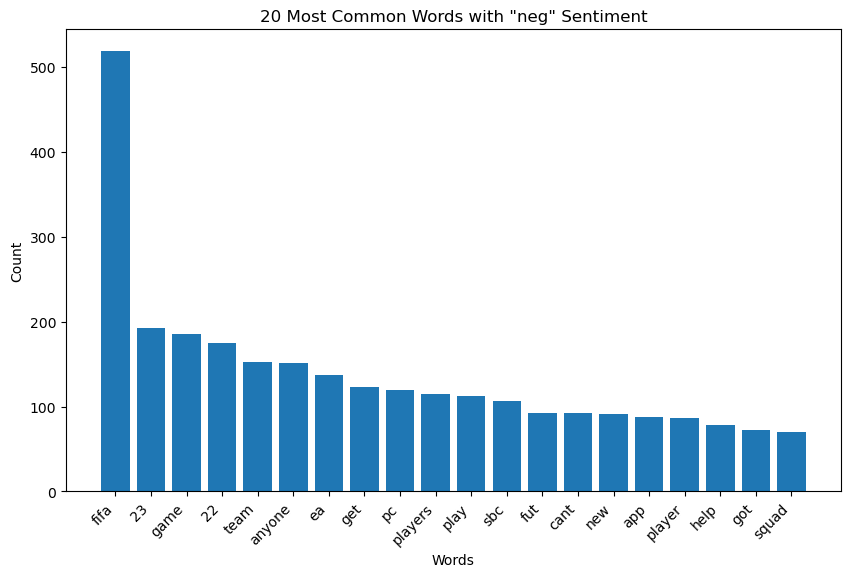

------------------------
------------------------
pos :


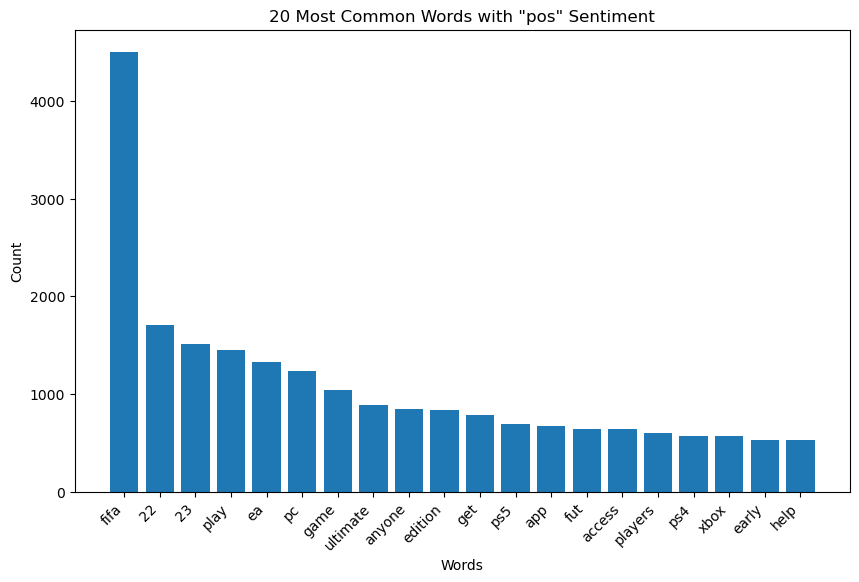

------------------------
------------------------


In [7]:
df_use = df_noneu[df_noneu["month"] == 9]
filtered_df = df_use[~df_use['title'].str.contains(r'\[deleted by user\]')]
grouped = filtered_df.groupby(['sentiment'])

for category, group in grouped:
    category_df = pd.DataFrame(group)
    # Call the function with your DataFrame
    most_common_words = find_most_common_words(category_df['title'], n=20)

    print(category,":")

    # Print the 20 most common words and their frequencies
    # for word, count in most_common_words:
    #     print(f"{word}: {count}")

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in most_common_words], [count[1] for count in most_common_words])
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(f'20 Most Common Words with "{category}" Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("------------------------")
    print("------------------------")

C:\Users\84160\AppData\Local\Temp\ipykernel_27836\3697621585.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for category, group in grouped:


neg :


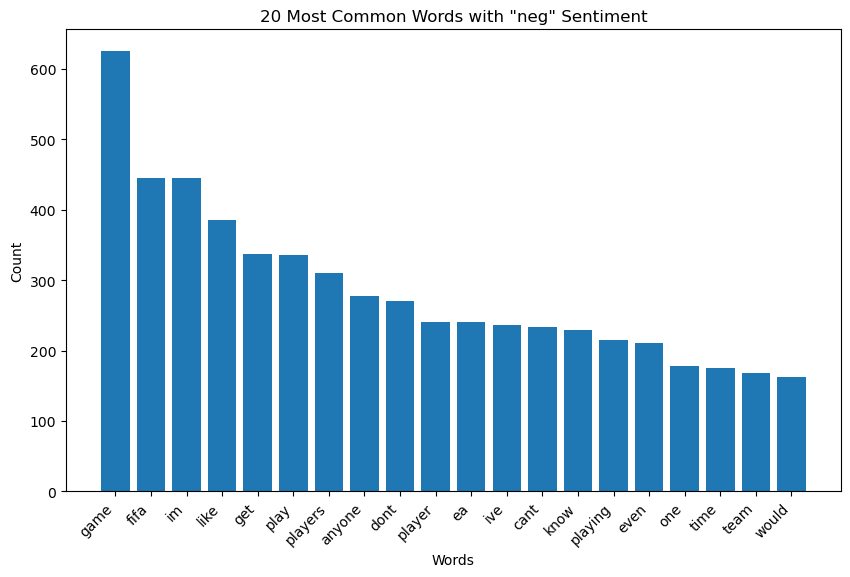

------------------------
------------------------
pos :


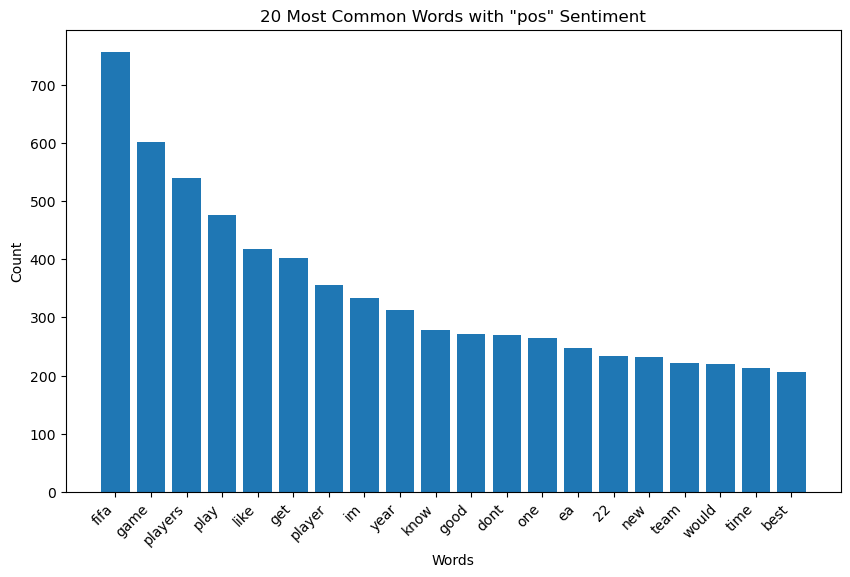

------------------------
------------------------


In [8]:
df_use = df_noneu[df_noneu["month"] == 9]

# Drop the missing values
df_filtered = df_use.dropna(subset=['selftext'])

# Filter out rows containing '[removed]' and '[delete]'
filtered_df = df_filtered[~df_filtered['selftext'].str.contains(r'\[removed\]|\[deleted\]')]

grouped = filtered_df.groupby(['sentiment'])

for category, group in grouped:
    category_df = pd.DataFrame(group)


    # Call the function with your DataFrame
    most_common_words = find_most_common_words(category_df['selftext'], n=20)

    print(category,":")

    # Print the 5 most common words and their frequencies
    # for word, count in most_common_words:
    #     print(f"{word}: {count}")
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in most_common_words], [count[1] for count in most_common_words])
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(f'20 Most Common Words with "{category}" Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    print("------------------------")
    print("------------------------")

## by post date

In [5]:
import pandas as pd

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {'post_date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
        'sentiment': ['positive', 'negative', 'positive', 'positive']}
# df_check = pd.DataFrame(data)
df_check = df_noneu.copy()

# Convert sentiment to binary values (1 for positive, 0 for others)
df_check['sentiment_binary'] = df_check['sentiment'].apply(lambda x: 1 if x == 'pos' else 0)

# Group by 'post_date' and calculate the sum of positive and total sentiments
grouped_df_check = df_check.groupby('post_date')['sentiment_binary'].agg(['sum', 'count']).reset_index()

# Calculate the ratio of positive sentiments to total sentiments
grouped_df_check['positive_ratio'] = grouped_df_check['sum'] / grouped_df_check['count']

# Display the resulting DataFrame
print(grouped_df_check)

      post_date  sum  count  positive_ratio
0    2021-01-01  452    659        0.685888
1    2021-01-02  608    855        0.711111
2    2021-01-03  502    748        0.671123
3    2021-01-04  521    718        0.725627
4    2021-01-05  430    631        0.681458
..          ...  ...    ...             ...
815  2023-03-27  205    244        0.840164
816  2023-03-28  140    173        0.809249
817  2023-03-29  192    228        0.842105
818  2023-03-30  159    192        0.828125
819  2023-03-31  153    194        0.788660

[820 rows x 4 columns]


In [6]:
import plotly.express as px

In [7]:
fig = px.line(grouped_df_check, x='post_date', y="positive_ratio")
# Adding title to the figure
fig.update_layout(title_text='Daily Trend of the Positive Ratio of FIFA Series')

fig_file_path = '../../img/daily_fifa_trend.html'
fig.write_html(fig_file_path)

fig.show()

## by year month

In [8]:
df_check = df_noneu.copy()

# Convert sentiment to binary values (1 for positive, 0 for others)
df_check['sentiment_binary'] = df_check['sentiment'].apply(lambda x: 1 if x == 'pos' else 0)

# Group by 'post_date' and calculate the sum of positive and total sentiments
grouped_df_check = df_check.groupby(['year','month'])['sentiment_binary'].agg(['sum', 'count']).reset_index()

# Calculate the ratio of positive sentiments to total sentiments
grouped_df_check['positive_ratio'] = grouped_df_check['sum'] / grouped_df_check['count']

# Display the resulting DataFrame
print(grouped_df_check)

    year  month    sum  count  positive_ratio
0   2021      1  14351  20250        0.708691
1   2021      2  10817  15242        0.709684
2   2021      3  10112  13938        0.725499
3   2021      4   7499  10273        0.729972
4   2021      5   7580  10238        0.740379
5   2021      6   5180   6933        0.747151
6   2021      7   4983   6834        0.729148
7   2021      8   4535   5961        0.760778
8   2021      9  12104  13213        0.916068
9   2021     10  17245  19497        0.884495
10  2021     11  10344  12368        0.836352
11  2021     12   9534  11448        0.832809
12  2022      1   9954  12218        0.814700
13  2022      2   7515   9433        0.796671
14  2022      3   5017   7317        0.685664
15  2022      4   3947   5682        0.694650
16  2022      5   5435   7553        0.719582
17  2022      6   3789   5199        0.728794
18  2022      7   3439   4853        0.708634
19  2022      8   3560   4864        0.731908
20  2022      9   7588   9252     

In [9]:
year_2021 = grouped_df_check['positive_ratio'].head(12).tolist()
year_2022 = grouped_df_check['positive_ratio'].iloc[12:24].tolist()
year_2023 = grouped_df_check['positive_ratio'].iloc[24:].tolist()

In [10]:
year_2021_count = grouped_df_check['count'].head(12).tolist()
year_2022_count = grouped_df_check['count'].iloc[12:24].tolist()
year_2023_count = grouped_df_check['count'].iloc[24:].tolist()

In [13]:
import plotly.graph_objects as go

In [32]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x=month, y= year_2021 , name='2021',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=month, y= year_2022, name = '2022',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=month, y= year_2023, name = '2023',
                         line=dict(color='green', width=4)))

# Edit the layout
fig.update_layout(title='Compare the positive ratio by month',
                   xaxis_title='Month',
                   yaxis_title='Positive Ratio')


fig.show()

In [34]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x=month, y= year_2021_count , name='2021',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=month, y= year_2022_count, name = '2022',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=month, y= year_2023_count, name = '2023',
                         line=dict(color='green', width=4)))

# Edit the layout
fig.update_layout(title='Compare the total subreddits posts by month',
                   xaxis_title='Month',
                   yaxis_title='Positive Ratio')


fig.show()

In [12]:
from plotly.subplots import make_subplots

In [16]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

fig = go.Figure()

fig = make_subplots(rows=2, cols=1, subplot_titles=(
    'Compare the Positive Ratio by Month',
    'Compare the Total Number of Reddits Posts by Month'
))

# Create and style traces
fig.add_trace(go.Scatter(x=month, y= year_2021 , name='2021_ratio',
                         line=dict(color='firebrick', width=4)),row=1, col=1)
fig.add_trace(go.Scatter(x=month, y= year_2022, name = '2022_ratio',
                         line=dict(color='royalblue', width=4)),row=1, col=1)
fig.add_trace(go.Scatter(x=month, y= year_2023, name = '2023_ratio',
                         line=dict(color='green', width=4)),row=1, col=1)

# Create and style traces
fig.add_trace(go.Scatter(x=month, y= year_2021_count , name='2021_total',
                         line=dict(color='firebrick', width=4)),row=2, col=1)
fig.add_trace(go.Scatter(x=month, y= year_2022_count, name = '2022_total',
                         line=dict(color='royalblue', width=4)),row=2, col=1)
fig.add_trace(go.Scatter(x=month, y= year_2023_count, name = '2023_total',
                         line=dict(color='green', width=4)),row=2, col=1)


# # Edit the layout
# fig.update_xaxes(title_text='Month', row=1, col=1)
fig.update_yaxes(title_text='Positive Ratio', row=1, col=1)
fig.update_xaxes(title_text='Month', row=2, col=1)
fig.update_yaxes(title_text='Total Number', row=2, col=1)

fig_file_path = '../../img/combined_fifa_trend.html'
fig.write_html(fig_file_path)

fig.show()

# previous

## by post date

In [3]:
df_date_count = df.groupby(["post_date","sentiment"]).count().reset_index()
df_date_count

,post_date,sentiment,subreddit,title,selftext,created_utc,year,month
0,2021-01-01,neg,207,207,176,207,207,207
1,2021-01-01,neutral,2,2,2,2,2,2
2,2021-01-01,pos,452,452,410,452,452,452
3,2021-01-02,neg,247,247,219,247,247,247
4,2021-01-02,pos,608,608,539,608,608,608
...,...,...,...,...,...,...,...,...
2008,2023-03-29,pos,192,192,172,192,192,192
2009,2023-03-30,neg,33,33,28,33,33,33
2010,2023-03-30,pos,159,159,138,159,159,159
2011,2023-03-31,neg,41,41,33,41,41,41


In [7]:
df_date_filter=df_date_count[df_date_count["sentiment"] != "neutral"]
df_date_filter.head()

,post_date,sentiment,subreddit,title,selftext,created_utc,year,month
0,2021-01-01,neg,207,207,176,207,207,207
2,2021-01-01,pos,452,452,410,452,452,452
3,2021-01-02,neg,247,247,219,247,247,247
4,2021-01-02,pos,608,608,539,608,608,608
5,2021-01-03,neg,246,246,216,246,246,246


## by year month

In [4]:
df_month_count = df.groupby(["year","month","sentiment"]).count().reset_index()
df_month_count

,year,month,sentiment,subreddit,title,selftext,created_utc,post_date
0,2021,1,neg,5899,5899,5137,5899,5899
1,2021,1,neutral,42,42,41,42,42
2,2021,1,pos,14351,14351,12623,14351,14351
3,2021,2,neg,4425,4425,3864,4425,4425
4,2021,2,neutral,30,30,25,30,30
...,...,...,...,...,...,...,...,...
76,2023,2,neutral,13,13,11,13,13
77,2023,2,pos,5017,5017,4245,5017,5017
78,2023,3,neg,1069,1069,871,1069,1069
79,2023,3,neutral,12,12,11,12,12


# TFIDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Step 2: Fit and transform the "title" column
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['selftext'])

In [56]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['sentiment'] = filtered_df['sentiment']

In [57]:
top_words_per_group = (
    tfidf_df.groupby(['sentiment'])
            .mean()
            #.T  # Transpose to have words as rows and groups as columns
            .apply(lambda x: x.nlargest(10).index.tolist(), axis=1)
)

# Display the top 10 words for each subreddit and sentiment group
print(top_words_per_group)

sentiment
neg    [striker, better, need, area, angeles, hoped, ...
pos    [reaction, friendlies, gks, fuck, speed, insan...
dtype: object


In [65]:
print("Top 10 Positive word for FIFA in Sep:",top_words_per_group["pos"])
print("Top 10 Negative word for FIFA in Sep:",top_words_per_group["neg"])

Top 10 Positive word for FIFA in Sep: ['reaction', 'friendlies', 'gks', 'fuck', 'speed', 'insane', 'lobby', 'telling', 'gameplay', 'connection']
Top 10 Negative word for FIFA in Sep: ['striker', 'better', 'need', 'area', 'angeles', 'hoped', 'tackled', 'inputs', 'sec', 'addressed']
